In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("/home/ram_swe/Desktop/FFF/sales_data.csv")

df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,Ewallet,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,Credit card,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,Ewallet,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,Ewallet,5.3


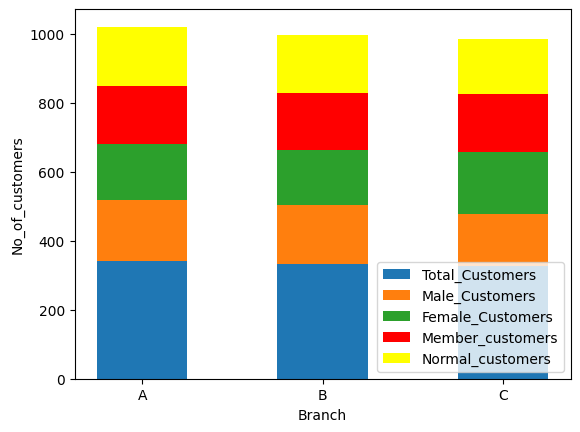

In [2]:
# Customer Summary

b1=df.loc[df["Branch"]=="A"]
b2=df.loc[df["Branch"]=="B"]
b3=df.loc[df["Branch"]=="C"]

# Total Customer
b1 #340  
b2 #332 
b3 #328 

# Male
b1.loc[b1["Gender"]=="Male"] # 179
b2.loc[b2["Gender"]=="Male"] # 170
b3.loc[b3["Gender"]=="Male"] # 150


# Female
b1.loc[b1["Gender"]=="Female"] #161
b2.loc[b2["Gender"]=="Female"] # 162
b3.loc[b3["Gender"]=="Female"] # 178

# Rating
overall_rate_A=b1["Rating"].sum()/340 
overall_rate_B=b2["Rating"].sum()/332
overall_rate_C=b3["Rating"].sum()/328

# Normal customers
bnc1=b1.loc[b1["Customer type"]=="Normal"]
bnc2=b2.loc[b2["Customer type"]=="Normal"]
bnc3=b3.loc[b3["Customer type"]=="Normal"]

# General customer
b1g=b1.loc[b1["Customer type"]=="Member"]
b2g=b2.loc[b2["Customer type"]=="Member"]
b3g=b3.loc[b3["Customer type"]=="Member"]




branch_summary=pd.DataFrame({"Branch":["A","B","C"],
          "Total_Customers":[340,332,328],
          "Male":[179,170,150],
          "Female":[161,162,178],
          "Normal_customers":[173,167,159],
          "Member_customer":[167,165,169],
          "Over_all_rate":[overall_rate_A,overall_rate_B,overall_rate_C]})

branch_summary=branch_summary.set_index("Branch")

want=int(input("Select 1.Dataframe \n2.Visual Data:\t"))
if want==1:
    print(branch_summary)

elif want==2:
  

    x=np.array(["A","B","C"])
    w=0.50

    tc=branch_summary["Total_Customers"]
    y=tc.values
    #-----------------------------------------
    tc1=branch_summary["Male"]
    y1=tc1.values
    #----------------------------------------
    tc2=branch_summary["Female"]
    y2=tc2.values
    #--------------------------------------
    tc3=branch_summary['Member_customer']
    y3=tc3.values
    #--------------------------------------

    tc4=branch_summary['Normal_customers']
    y4=tc4.values
    #--------------------------------------

    #plotting total_customers
    plt.bar(x,y,width=w,label='Total_Customers')

    #plotting male customers
    plt.bar(x,y1,width=w,bottom=y,label="Male_Customers")

    #plotting female customers
    plt.bar(x,y2,width=w,bottom=[y[a]+y1[a]for a in range (len(x))],label="Female_Customers")

    #plotting 
    plt.bar(x,y3,width=w,bottom=[y[a]+y1[a]+y2[a]for a in range (len(x))],label='Member_customers',color='red')

    plt.bar(x,y4,width=w,label="Normal_customers",bottom=[y[a]+y1[a]+y2[a]+y3[a]for a in range (len(x))],color='yellow')

    plt.xlabel("Branch")
    plt.ylabel("No_of_customers")
    plt.legend(loc='lower right') 
    plt.show()



In [3]:
# cash payments
b1c=b1.loc[b1.loc[:,"Payment"]=="Cash"]
b2c=b2.loc[b2.loc[:,"Payment"]=="Cash"]
b3c=b3.loc[b3.loc[:,"Payment"]=="Cash"]


# Ewallet payments
b1ew=b1.loc[b1.loc[:,"Payment"]=="Ewallet"]
b2ew=b2.loc[b2.loc[:,"Payment"]=="Ewallet"]
b3ew=b3.loc[b3.loc[:,"Payment"]=="Ewallet"]


# Credit card payments
b1cc=b1.loc[b1.loc[:,"Payment"]=="Credit card"]
b2cc=b2.loc[b2.loc[:,"Payment"]=="Credit card"]
b3cc=b3.loc[b3.loc[:,"Payment"]=="Credit card"]

# total_payments
Tb1=(b1c.iloc[:,9].sum())+(b1ew.iloc[:,9].sum())+(b1cc.iloc[:,9].sum())
Tb2=(b2c.iloc[:,9].sum())+(b2ew.iloc[:,9].sum())+(b2cc.iloc[:,9].sum())
Tb3=(b3c.iloc[:,9].sum())+(b3ew.iloc[:,9].sum())+(b3cc.iloc[:,9].sum())

pay_sum_dic=pd.DataFrame({ "Total_payments":[Tb1,Tb2,Tb3],
                          "Cash":[(b1c.iloc[:,9].sum()),(b2c.iloc[:,9].sum()),(b1c.iloc[:,9].sum())],
                          "E-Wallet":[(b1ew.iloc[:,9].sum()),(b2ew.iloc[:,9].sum()),(b1ew.iloc[:,9].sum())],
                          "Credit_Card":[(b1cc.iloc[:,9].sum()),(b2cc.iloc[:,9].sum()),(b1cc.iloc[:,9].sum())],
                          "Branch":["A","B","C"]})
                        
pay_sum_dic=pay_sum_dic.set_index("Branch")
pay_sum_dic


,Total_payments,Cash,E-Wallet,Credit_Card
Branch,,,,
A,106200.3705,33781.2510,39324.369,33094.7505
B,106197.6720,35339.4615,33513.354,37344.8565
C,110568.7065,33781.2510,39324.369,33094.7505


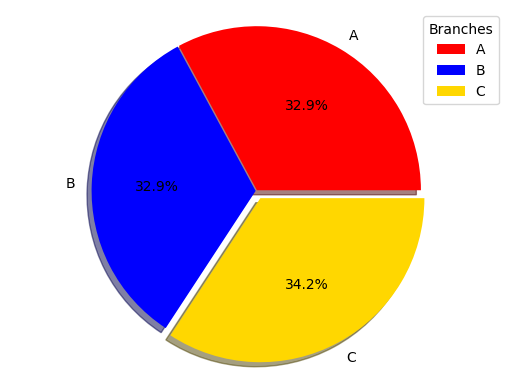

,Total_payments,Cash,E-Wallet,Credit_Card
Branch,,,,
A,106200.3705,33781.2510,39324.369,33094.7505
B,106197.6720,35339.4615,33513.354,37344.8565
C,110568.7065,33781.2510,39324.369,33094.7505


In [6]:


plt.pie(pay_sum_dic['Total_payments'],labels=["A","B","C"],colors=["red","blue","gold"],autopct='%1.1f%%',shadow=True,explode=[0.005,0.005,0.05])
plt.axis('equal')
plt.legend(title="Branches")
plt.show()
pay_sum_dic

In [ ]:


A=np.array(pay_sum_dic.iloc[0,1:4])
B=np.array(pay_sum_dic.iloc[1,1:4])
C=np.array(pay_sum_dic.iloc[2,1:4])

labeller=["Cash","E-Wallet","Credit_card"]
titles=["A","B","C"]


fig,ax=plt.subplots(1,3,figsize=(18,4))

for i in range(3):
    ax[i].pie([A[i], B[i], C[i]], labels=labeller, autopct="%1.1f%%", startangle=90)
    ax[i].axis("equal")

    ax[i].text(0.5, 1.05, titles[i], transform=ax[i].transAxes, ha="center")

plt.show()